# Import libraries and dataframe

In [3]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import plot_confusion_matrix, f1_score
from scoring_functions import scoring_functions as f

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

# imp allows to reload the above function file when tinkering with it without kernel restart
import imp

import matplotlib.pyplot as plt

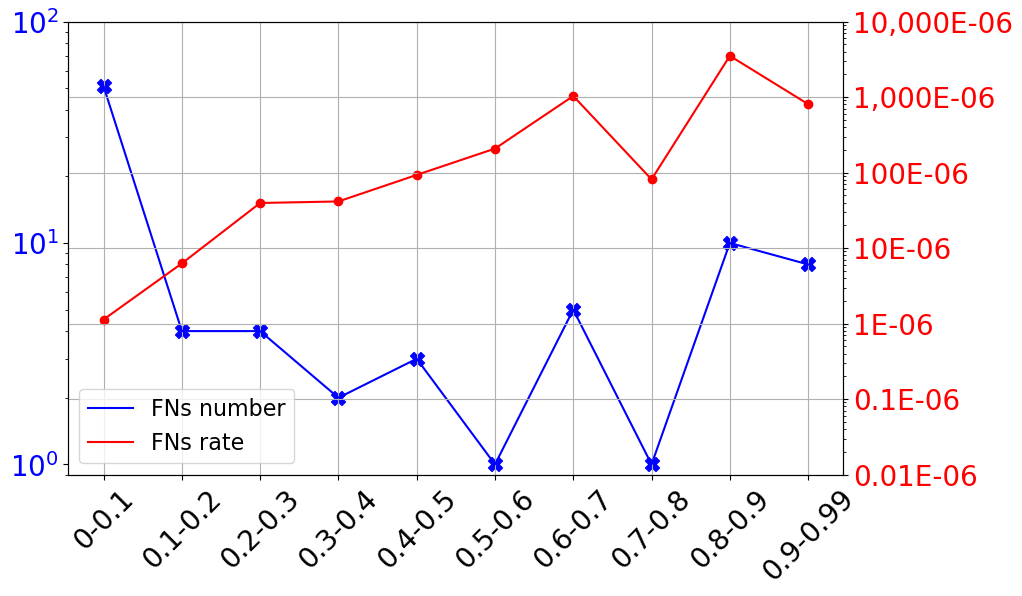

In [82]:
#rumor
values = [1.13, 6.26, 39.52, 41.41, 93, 207.56, 1032.2, 81.22, 3510, 805.72]

plt.figure(figsize = (10,6), dpi=100)
FNn = [51, 4, 4, 2, 3, 1, 5, 1, 10, 8]
plot1 = plt.plot(FNn, color = 'blue')
plt.scatter(np.arange(0,10), FNn, marker='X', s = 100, color = 'blue')
plt.ylim(0.9,100)
plt.yscale('log')
plt.tick_params(axis = 'y', labelsize = 20)
plt.tick_params(axis='y', labelcolor='blue')



plt.ylim(0.9, 100)
plt.yscale('log')
plt.xticks(np.arange(10), ["0-0.1", 
                          "0.1-0.2", 
                          "0.2-0.3", 
                          "0.3-0.4", 
                          "0.4-0.5",
                          "0.5-0.6", 
                          "0.6-0.7",
                          "0.7-0.8",
                          "0.8-0.9",
                          "0.9-0.99"],
                           rotation=45, fontsize = 20)
plt.grid(True, axis = 'x')
ax = plt.twinx()
ax.grid(True, axis='y')
plot2 = ax.plot(values, color = 'red')
ax.scatter(np.arange(0,10), values, color = 'red')
ax.set_yscale('log')
ax.set_ylim(0.01, 10000)
ax.set_yticks(np.logspace(-2,4,7))
ax.set_yticklabels(['0.01E-06', 
           '0.1E-06',
           '1E-06',
           '10E-06',
           '100E-06',
           '1,000E-06',
           '10,000E-06'])
ax.tick_params(axis = 'y', labelsize = 20)
ax.tick_params(axis='y', labelcolor='red')

plots = plot1+plot2
plt.legend(plots, ['FNs number', 'FNs rate'], loc=3, fontsize = 16)

plt.savefig("rumor_FNrate_new.jpeg", bbox_inches='tight')
plt.show()








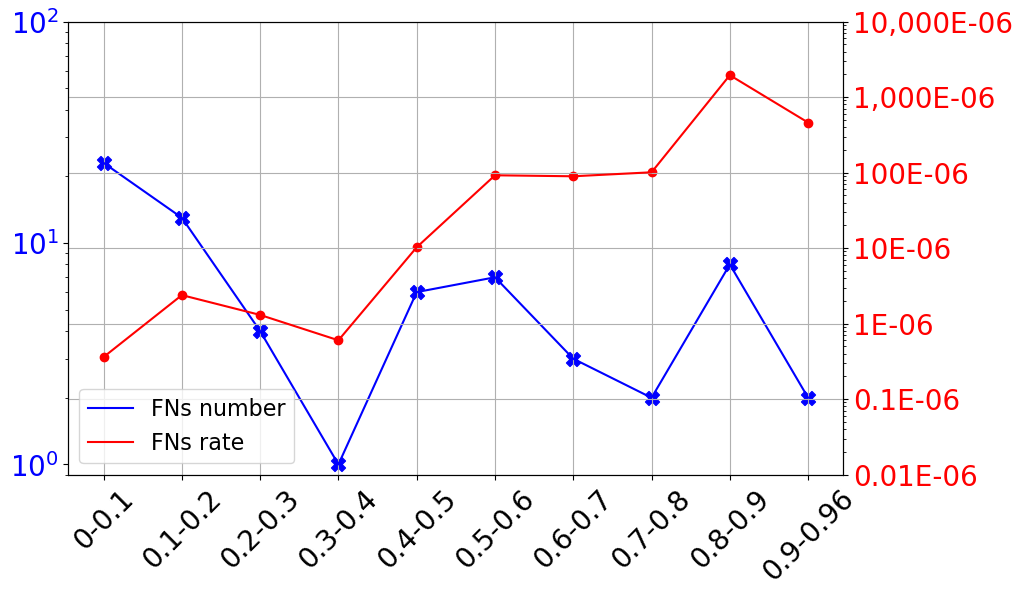

In [88]:
#CANDI
values = [0.36, 2.38, 1.30, 0.6, 10.24, 91.98, 89.22, 100.78, 1947.42, 459.13]

plt.figure(figsize = (10,6), dpi=100)
FNn = [23, 13, 4, 1, 6, 7, 3, 2, 8, 2]
plot1 = plt.plot(FNn, color = 'blue')
plt.scatter(np.arange(0,10), FNn, marker='X', s = 100, color = 'blue')
plt.ylim(0.9,100)
plt.yscale('log')
plt.tick_params(axis = 'y', labelsize = 20)
plt.tick_params(axis='y', labelcolor='blue')



plt.ylim(0.9, 100)
plt.yscale('log')
plt.xticks(np.arange(10), ["0-0.1", 
                          "0.1-0.2", 
                          "0.2-0.3", 
                          "0.3-0.4", 
                          "0.4-0.5",
                          "0.5-0.6", 
                          "0.6-0.7",
                          "0.7-0.8",
                          "0.8-0.9",
                          "0.9-0.96"],
                           rotation=45, fontsize = 20)
plt.grid(True, axis = 'x')
ax = plt.twinx()
ax.grid(True, axis='y')
plot2 = ax.plot(values, color = 'red')
ax.scatter(np.arange(0,10), values, color = 'red')
ax.set_yscale('log')
ax.set_ylim(0.01, 10000)
ax.set_yticks(np.logspace(-2,4,7))
ax.set_yticklabels(['0.01E-06', 
           '0.1E-06',
           '1E-06',
           '10E-06',
           '100E-06',
           '1,000E-06',
           '10,000E-06'])
ax.tick_params(axis = 'y', labelsize = 20)
ax.tick_params(axis='y', labelcolor='red')

plots = plot1+plot2
plt.legend(plots, ['FNs number', 'FNs rate'], loc=3, fontsize = 16)

plt.savefig("candi_FNrate_new.jpeg", bbox_inches='tight')
plt.show()




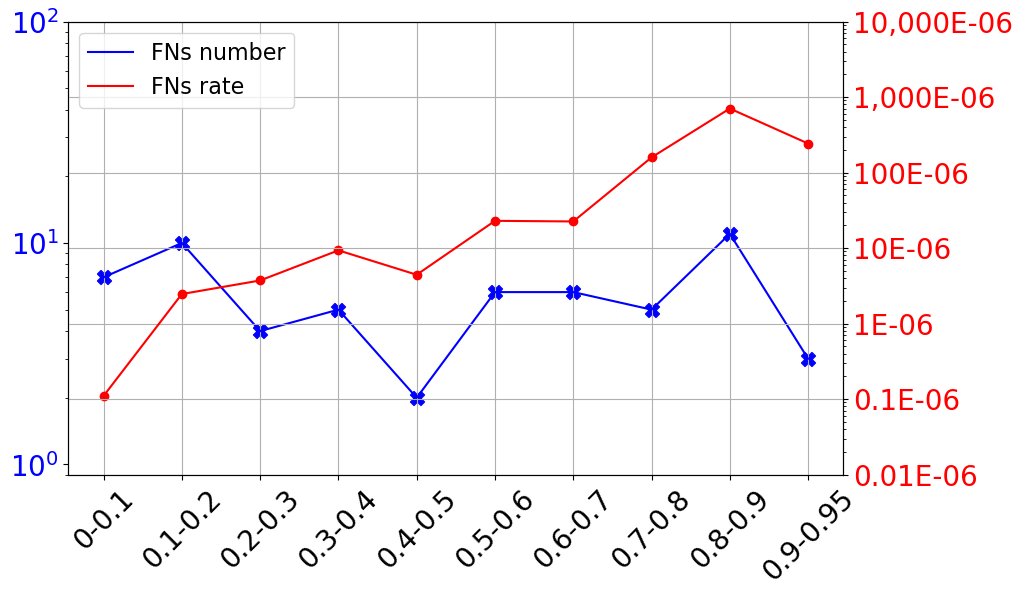

In [89]:
#Complaints
values = [0.11, 2.46, 3.72, 9.32, 4.43, 22.93, 22.50, 158.77, 704.36, 242.15]
FNn = [7, 10, 4, 5, 2, 6, 6, 5, 11, 3]

plt.figure(figsize = (10,6), dpi=100)
plot1 = plt.plot(FNn, color = 'blue')
plt.scatter(np.arange(0,10), FNn, marker='X', s = 100, color = 'blue')
plt.ylim(0.9,100)
plt.yscale('log')
plt.tick_params(axis = 'y', labelsize = 20)
plt.tick_params(axis='y', labelcolor='blue')



plt.ylim(0.9, 100)
plt.yscale('log')
plt.xticks(np.arange(10), ["0-0.1", 
                          "0.1-0.2", 
                          "0.2-0.3", 
                          "0.3-0.4", 
                          "0.4-0.5",
                          "0.5-0.6", 
                          "0.6-0.7",
                          "0.7-0.8",
                          "0.8-0.9",
                          "0.9-0.95"],
                           rotation=45, fontsize = 20)
plt.grid(True, axis = 'x')
ax = plt.twinx()
ax.grid(True, axis='y')
plot2 = ax.plot(values, color = 'red')
ax.scatter(np.arange(0,10), values, color = 'red')
ax.set_yscale('log')
ax.set_ylim(0.01, 10000)
ax.set_yticks(np.logspace(-2,4,7))
ax.set_yticklabels(['0.01E-06', 
           '0.1E-06',
           '1E-06',
           '10E-06',
           '100E-06',
           '1,000E-06',
           '10,000E-06'])
ax.tick_params(axis = 'y', labelsize = 20)
ax.tick_params(axis='y', labelcolor='red')

plots = plot1+plot2
plt.legend(plots, ['FNs number', 'FNs rate'], loc=2, fontsize = 16)

plt.savefig("complaints_FNrate_new.jpeg", bbox_inches='tight')
plt.show()




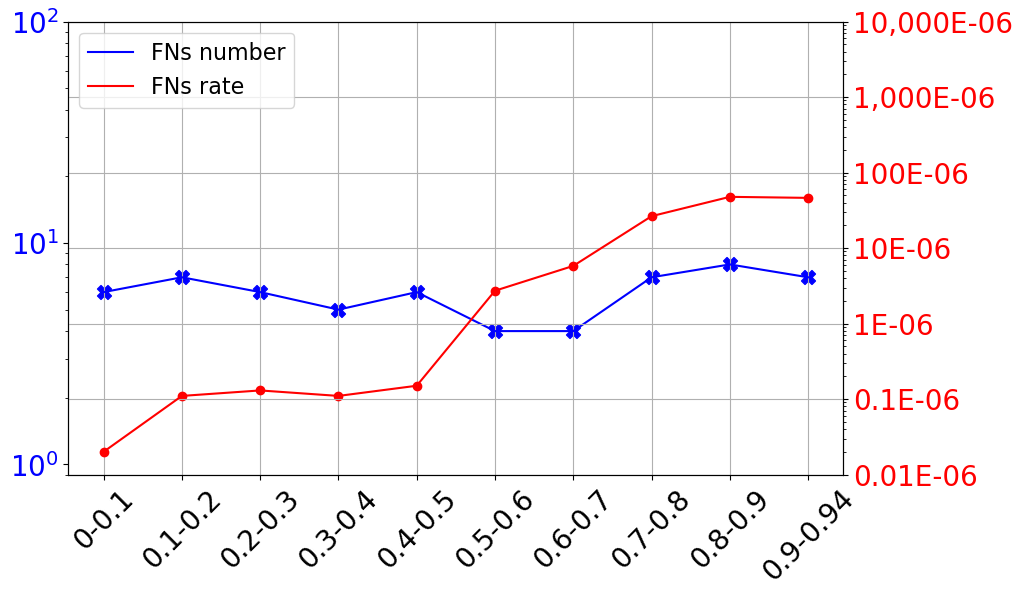

In [90]:
#Secrecy
values = [0.02, 0.11, 0.13, 0.11, 0.15, 2.72, 5.80, 26.43, 47.66, 46.18]
FNn = [6, 7, 6, 5, 6, 4, 4, 7, 8, 7]
plt.figure(figsize = (10,6), dpi=100)
plot1 = plt.plot(FNn, color = 'blue')
plt.scatter(np.arange(0,10), FNn, marker='X', s = 100, color = 'blue')
plt.ylim(0.9,100)
plt.yscale('log')
plt.tick_params(axis = 'y', labelsize = 20)
plt.tick_params(axis='y', labelcolor='blue')



plt.ylim(0.9, 100)
plt.yscale('log')
plt.xticks(np.arange(10), ["0-0.1", 
                          "0.1-0.2", 
                          "0.2-0.3", 
                          "0.3-0.4", 
                          "0.4-0.5",
                          "0.5-0.6", 
                          "0.6-0.7",
                          "0.7-0.8",
                          "0.8-0.9",
                          "0.9-0.94"],
                           rotation=45, fontsize = 20)
plt.grid(True, axis = 'x')
ax = plt.twinx()
ax.grid(True, axis='y')
plot2 = ax.plot(values, color = 'red')
ax.scatter(np.arange(0,10), values, color = 'red')
ax.set_yscale('log')
ax.set_ylim(0.01, 10000)
ax.set_yticks(np.logspace(-2,4,7))
ax.set_yticklabels(['0.01E-06', 
           '0.1E-06',
           '1E-06',
           '10E-06',
           '100E-06',
           '1,000E-06',
           '10,000E-06'])
ax.tick_params(axis = 'y', labelsize = 20)
ax.tick_params(axis='y', labelcolor='red')

plots = plot1+plot2
plt.legend(plots, ['FNs number', 'FNs rate'], loc=2, fontsize = 16)

plt.savefig("secrecy_FNrate_new.jpeg", bbox_inches='tight')
plt.show()

In [ ]:
values = [2.74, 12.14, 91.98, 89.22, 100.78, 2406.56]

plt.figure(figsize = (10,6), dpi=100)
plt.plot(values)
plt.scatter([1, 3.5, ]], values)
# plt.scatter()
plt.ylim(0.01, 10000)
plt.yscale('log')
plt.xticks(np.arange(10), ["0-0.1", 
                          "0.1-0.2", 
                          "0.2-0.3", 
                          "0.3-0.4", 
                          "0.4-0.5",
                          "0.5-0.6", 
                          "0.6-0.7",
                          "0.7-0.8",
                          "0.8-0.9",
                          "0.9-1"],
                           rotation=45, fontsize = 20)
plt.yticks(fontsize=12)
plt.yticks(np.logspace(-2,4,7),['0.01E-06', 
           '0.1E-06',
           '1E-06',
           '10E-06',
           '100E-06',
           '1,000E-06',
           '10,000E-06'], fontsize = 20)
plt.grid(True)
plt.savefig("rumor_FNrate.jpeg", bbox_inches='tight')
plt.show()



In [ ]:
values = [1.13, 6.26, 39.52, 41.41, 93, 207.56, 1032.2, 81.22, 3510, 805.72]

plt.figure(figsize = (10,6), dpi=100)
plt.plot(values)
plt.scatter(np.arange(0,10), values)
# plt.scatter()
plt.ylim(0.01, 10000)
plt.yscale('log')
plt.xticks(np.arange(10), ["0-0.1", 
                          "0.1-0.2", 
                          "0.2-0.3", 
                          "0.3-0.4", 
                          "0.4-0.5",
                          "0.5-0.6", 
                          "0.6-0.7",
                          "0.7-0.8",
                          "0.8-0.9",
                          "0.9-1"],
                           rotation=45, fontsize = 12)
plt.yticks(fontsize=12)
plt.yticks(np.logspace(-2,4,7),['0.01E-06', 
           '0.1E-06',
           '1E-06',
           '10E-06',
           '100E-06',
           '1,000E-06',
           '10,000E-06'])
plt.grid(True)
plt.savefig("rumor_FNrate.jpeg")
plt.show()



In [29]:
p = 51/45145404
p

1.1296831012964242e-06

In [88]:
from mpl_toolkits import mplot3d

In [95]:
deno = [45145404, 639303, 101219, 48294, 32258, 4818, 4844, 12312, 2849, 9929, 192074503]
FNnumber = [51, 4, 4, 2, 3, 1, 5, 1, 10, 8, 28]

p = np.divide(np.array(FNnumber), np.array(deno))

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:10.10f}'.format}, linewidth=130)
print(p)
# p
# p = 51/45145404
# p = 0.0001

# FN = np.arange(51, 510)
# p = 51/45145404
# np.set_printoptions(suppress=False)
# MOE = np.arange(0.00001, 0.01, 0.00001)
# print(MOE)
N = ((1.96**2) * p * (1-p))/((0.01*0.01)**2)
print(N)
# N = ((1.96**2) * p * (1-p))/((0.01*0.01)**2)
# print(len(N))
# plt.figure(figsize = (10,4))
# plt.plot(MOE, N)
# # plt.xscale('log')
# plt.yscale('log')
# plt.gca().invert_xaxis()
# plt.show()

# print(N)

# N
# # print(N)
# # print('%.2f' % N)
# np.set_printoptions(suppress=True,
#    formatter={'float_kind':'{:10.2f}'.format}, linewidth=130)
# print(N[:-1] - N[1:])


[0.0000011297 0.0000062568 0.0000395183 0.0000414130 0.0000930002 0.0002075550 0.0010322048 0.0000812216 0.0035100035
 0.0008057206 0.0000001458]
[433.9785699352 2403.6026509014 15180.7395315318 15908.5638289362 35723.6288407725 79717.7803383982 396122.4898927460
 31199.5449903125 1343670.0493211548 309276.2408041195 56.0015945060]


In [82]:
#CANDI
deno = [64143951, 5468298, 3076695, 1664926, 586044, 76101, 33623, 19846, 4108, 4356]
FNnumber = [23, 13, 4, 1, 6, 7, 3, 2, 8, 2]
p = np.divide(np.array(FNnumber), np.array(deno))
N = ((1.96**2) * p * (1-p))/((0.01*0.01)**2)
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:10.0f}'.format}, linewidth=130)
print(N)

[       138        913        499        231       3933      35333      34273      38710     746664     176301]


In [83]:
#Complaints
deno = [62936761, 4062144, 1074702, 536231, 451695, 261695, 266661, 31493, 15617, 12389]
FNnumber = [7, 10, 4, 5, 2, 6, 6, 5, 11, 3]
p = np.divide(np.array(FNnumber), np.array(deno))
N = ((1.96**2) * p * (1-p))/((0.01*0.01)**2)
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:10.0f}'.format}, linewidth=130)
print(N)

[        43        946       1430       3582       1701       8808       8644      60982     270397      93002]


In [84]:
#Secrecy
deno = [36607421, 6406624, 4614297, 4465195, 3952778, 147081, 68940, 26489, 16787, 15159]
FNnumber = [6, 7, 6, 5, 6, 4, 4, 7, 8, 7]
p = np.divide(np.array(FNnumber), np.array(deno))
N = ((1.96**2) * p * (1-p))/((0.01*0.01)**2)
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:10.0f}'.format}, linewidth=130)
print(N)

[        63        420        500        430        583      10447      22288     101492     182988     177312]


In [28]:
p = 51/45145404

N = (1.96**2 * 0.0001 * (1-0.0001))/((0.01*0.01)**2)
print(N)

38412.15839999999


In [18]:
!python3 -m pip install xgboost

In [5]:
df = pd.read_csv('complaints_processed_0722_train.csv')


In [6]:
# df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(df['processed narrative'].isnull().sum())
df = df.dropna()
print(df['processed narrative'].isnull().sum())

17
0


## Change product names to integers

In [7]:
df['product'].unique()

array(['Money Transfer', 'Non Money Transfer'], dtype=object)

In [8]:
df['product'].value_counts()

Non Money Transfer    162700
Money Transfer          2831
Name: product, dtype: int64

In [9]:
product_dict ={'Non Money Transfer': 0, 'Money Transfer': 1}

In [10]:
df['product'].replace(product_dict, inplace=True)

In [11]:
df['product'].unique()

array([1, 0])

In [12]:
df['product'].value_counts()

0    162700
1      2831
Name: product, dtype: int64

In [13]:
df.head()

,Unnamed: 0,product,narrative,processed narrative
0,0,1,"On XX/XX/2019, I used WorldRemit to send money...",used worldremit send money internationally wor...
1,1,1,"On XX/XX/2020, my son had initiated money tran...",son initiated money transfer paypal account pa...
2,2,1,"On Thursday, XX/XX/XXXX, my son sent me {$1000...",thursday son sent via cash app went go cash ap...
3,3,1,This dispute is with Bank of America. It relat...,dispute bank america relates unconscionable co...
4,4,1,western union : - XXXX recording date : - XX/X...,western union recording date amount usd amount...


# Train-test split

In [14]:
X = df.drop(['product'], axis=1)
y = df['product']
X = X['processed narrative']
vect_y_train = y

In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: product, dtype: int64

In [16]:
vect_y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: product, dtype: int64

### CountVector

In [17]:
# CountVector
vectorizer = CountVectorizer(ngram_range=(2,3),stop_words = 'english', min_df = 2)
vect_X_train = vectorizer.fit_transform(X)
feature_names =  vectorizer.get_feature_names()
print(len(feature_names))

/Users/keqiaoli/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1741272


In [ ]:
import time
start = time.time()

pipe = Pipeline([('CountVect', CountVectorizer(stop_words='english',
                                              ngram_range=(2, 3))),
                   ('clf', LogisticRegression(random_state=0, 
                                              fit_intercept=False, max_iter = 500))
                    ])
                 
param_grid = {'clf__C': np.logspace(-3,3,7),
              'clf__penalty': ['l1', 'l2'],
              'clf__solver': ['liblinear'],
             } 

# param_grid = {'CountVect__max_features': [1000,2000, 3000, 4000, 5000],
#               'CountVect__min_df': [2, 5, 10],
#               'clf__C': np.logspace(-3,3,7),
#               'clf__penalty': ['l1', 'l2'],
#               'clf__solver': ['liblinear', 'newton-cg', 'lbfgs'],
#               'clf__max_iter': [300, 500, 1000, 2000]
#              } 
# param_grid = {'CountVect__max_features': [1000,2000, 3000, 4000, 5000],
#               'CountVect__min_df': [2, 5, 10],
#               'clf__C': np.logspace(-3,3,7),
#               'clf__penalty': ['l1', 'l2'],
#               'clf__solver': ['liblinear', 'newton-cg', 'lbfgs'],
#               'clf__max_iter': [1000, 5000, 10000]
#              } 
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs = -1)

grid_countvect = grid.fit(X, y)

end=time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))



In [16]:
grid_countvect.best_params_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/qc/ys_y69ln715f54sflsztxbzw0000gn/T/ipykernel_58724/1250351345.py", line 1, in <module>
    grid_countvect.best_params_
NameError: name 'grid_countvect' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)

TypeError: object of type 'NoneType' has no len()

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)
pipe = Pipeline([('CountVect', CountVectorizer(stop_words='english', 
                                              ngram_range=(2, 3), min_df = 2)),
                 ('reducer', SelectKBest(f_classif, k=500000)),
                   ('clf', LogisticRegression(penalty = 'l2', C=0.1, solver = 'liblinear', random_state=0, 
                                              fit_intercept=False, max_iter=300, class_weight = 'balanced'))
                    ])
#max_features=50000
model_lr = pipe.fit(X_train, y_train)

In [81]:
def proba_to_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

In [82]:
# df_test = pd.read_csv('complaints_processed_0721_test.csv')
# df_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# df_test.head()
# if df_test['processed narrative'].isnull().sum() != 0:
#     df_test = df_test.dropna()
# df_test['processed narrative'].isnull().sum()


In [83]:
from sklearn.metrics import precision_recall_curve
from numpy import argmax
import matplotlib.pyplot as plt


df_test = pd.read_csv('complaints_processed_0722_test.csv')
df_test.drop(['Unnamed: 0'], axis=1, inplace=True)
if df_test['processed narrative'].isnull().sum() != 0:
    df_test = df_test.dropna()
df_test['processed narrative'].isnull().sum()
product_dict ={'Non Money Transfer': 0, 'Money Transfer': 1}
df_test['product'].replace(product_dict, inplace=True)
print(df_test['product'].value_counts())
X_test = df_test['processed narrative']
y_test = df_test['product']


print(y_val.value_counts())


pred_proba = model_lr.predict_proba(X_val)

pred_proba_class_1 = pred_proba[:,1]

precision, recall, thresholds = precision_recall_curve(y_val, pred_proba_class_1)
print(len(precision))
print(precision)


# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
print(len(fscore))
# # locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
print('precision', precision[ix], 'recall', recall[ix])


# plot the roc curve for the model
no_skill = len(y_val[y_val==1]) / len(y_val)

0    439891
1     16045
Name: product, dtype: int64
0    32548
1      559
Name: product, dtype: int64
30664
[0.01688465 0.01688516 0.01688567 ... 1.         1.         1.        ]
30664
Best Threshold=0.700595, F-Score=0.634
precision 0.680327868852459 recall 0.59391771019678


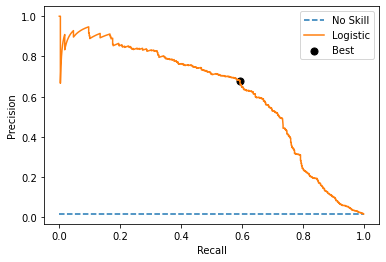

In [84]:
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best', s = 50)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()


In [85]:
print(thresholds[ix])
pred_proba_test = model_lr.predict_proba(X_test)
pred_proba_test_class_1 = pred_proba_test[:, 1]
y_hat = proba_to_classes(pred_proba_test_class_1, thresholds[ix])
print(f1_score(y_test, y_hat))
# predict_proba = model_lr.predict_proba

0.7005949698530561
0.6736055704649309


In [86]:
FNs_pred_proba = []
pred_neg = []
for index, (label, label_hat) in enumerate(zip(y_test, y_hat)):
    if label == 1 and label_hat == 0:
        FNs_pred_proba.append(pred_proba_test_class_1[index])
    if label_hat == 0:
        pred_neg.append(pred_proba_test_class_1[index])
        

6733 6758
[1261.  618.  666.  765. 1015. 1189. 1236.    8.]


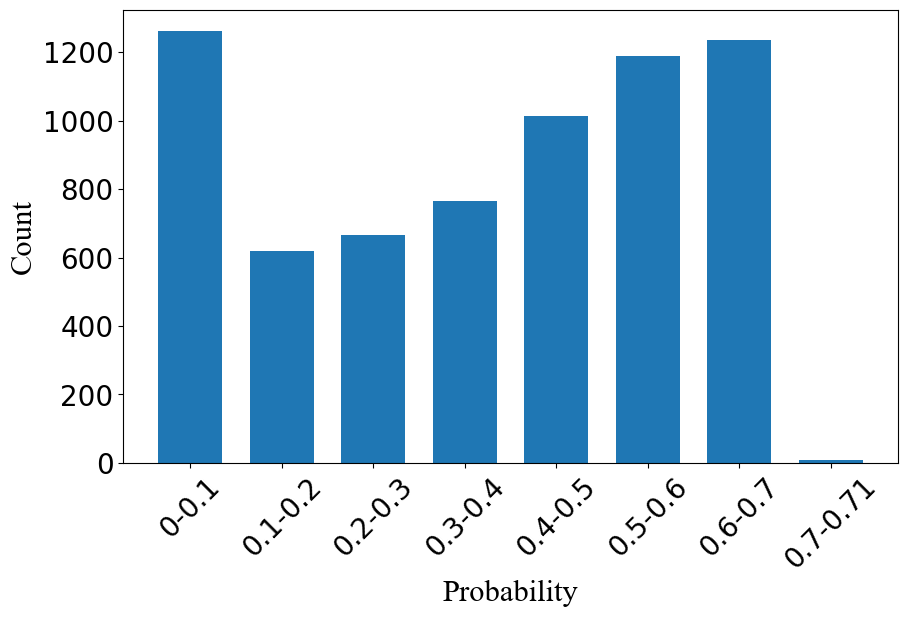

In [87]:
plt.figure(figsize = (10, 6), dpi=100)

FNs_pred_proba_no05 = [p for p in FNs_pred_proba if p!=0.5]


print(len(FNs_pred_proba_no05), len(FNs_pred_proba))
FNn, bins, _ = plt.hist(FNs_pred_proba, bins=8, range = [0,0.8], align='left', rwidth=0.7)
plt.xlabel('Probability', fontsize = 22, fontname = 'Times New Roman')
plt.ylabel('Count', fontsize = 22, fontname = 'Times New Roman')

plt.xticks(np.arange(0, 0.8, 0.1), ["0-0.1", 
                          "0.1-0.2", 
                          "0.2-0.3", 
                          "0.3-0.4", 
                          "0.4-0.5",
                          "0.5-0.6", 
                          "0.6-0.7",
                          "0.7-0.71"],
                           rotation=45, fontsize = 20)
print(FNn)
# plt.xlim(-0.05, 0.8)

plt.yticks(fontsize=20)
# plt.yscale('log')
# plt.ylim(0.9,2000)
plt.savefig("FN_distribution.jpeg", bbox_inches='tight')
plt.show()
# print(FNn)
# plt.show()



In [88]:
plt.figure(figsize = (10, 6))
pred_Nn, _, _ = plt.hist(pred_neg, bins=8, range = [0,0.8])
plt.close()
# print(pred_Nn)

In [89]:
np.array(pred_Nn)

array([3.62707e+05, 3.08950e+04, 1.95070e+04, 1.36780e+04, 1.08200e+04,
       4.42900e+03, 2.35600e+03, 1.50000e+01])

[0.00347664 0.02000324 0.03414159 0.05592923 0.09380776 0.26845789
 0.524618   0.53333333]


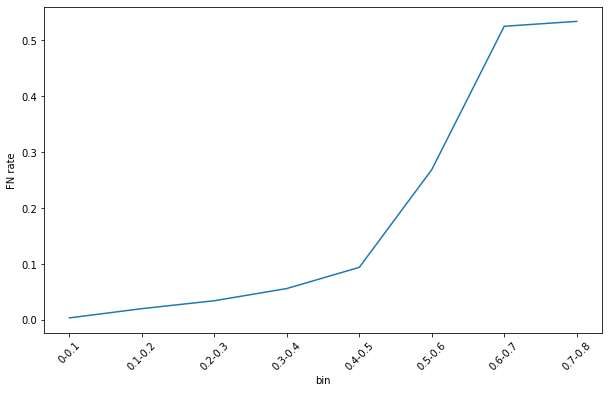

In [90]:
FN_rate = np.divide(np.array(FNn), np.array(pred_Nn))
print(FN_rate)
plt.close()
plt.figure(figsize = (10, 6))
plt.plot(FN_rate)
plt.xticks(np.arange(8), ["0-0.1", 
                          "0.1-0.2", 
                          "0.2-0.3", 
                          "0.3-0.4", 
                          "0.4-0.5",
                          "0.5-0.6", 
                          "0.6-0.7",
                          "0.7-0.8"],
                           rotation=45)

plt.ylabel('FN rate')
plt.xlabel('bin')
plt.show()

In [58]:
FN_rate

array([0.00347664, 0.02000324, 0.03414159, 0.05592923, 0.09380776,
       0.26845789, 0.524618  , 0.53333333])

### TF-IDF

In [65]:
pipe = Pipeline([('CountVect', TfidfVectorizer(stop_words='english', max_df=0.8,
                                              ngram_range=(2, 3), min_df = 2)),
                 ('reducer', SelectKBest(f_classif, k=200000)),
                   ('clf', LogisticRegression(penalty = 'l2', C=10, solver = 'liblinear', random_state=0, 
                                              fit_intercept=False, max_iter=1000, class_weight = 'balanced'))
                    ])
#max_features=50000
model2_lr = pipe.fit(X_train, y_train)

In [66]:
pred_proba_tfidf = model2_lr.predict_proba(X_val)

pred_proba_class_1_tfidf = pred_proba_tfidf[:,1]

precision2, recall2, thresholds2 = precision_recall_curve(y_val, pred_proba_class_1_tfidf)
print(len(precision2))
print(precision2)


# convert to f score
fscore2 = (2 * precision2 * recall2) / (precision2 + recall2)
print(len(fscore2))
# # locate the index of the largest f score
ix = argmax(fscore2)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds2[ix], fscore2[ix]))

print(precision2[ix], recall2[ix])


# plot the roc curve for the model
no_skill = len(y_val[y_val==1]) / len(y_val)

30675
[0.01688465 0.01688567 0.01688618 ... 1.         1.         1.        ]
30675
Best Threshold=0.545199, F-Score=0.653
0.6413793103448275 0.6654740608228981


In [70]:
print(thresholds2[ix])
pred_proba_test2 = model2_lr.predict_proba(X_test)
pred_proba_test2_class_1 = pred_proba_test2[:, 1]
y_hat2 = proba_to_classes(pred_proba_test2_class_1, thresholds2[ix])
print(f1_score(y_test, y_hat2))
# predict_proba = model_lr.predict_proba

0.5451989342409972
0.7098064472390768


In [71]:
FNs_pred_proba2 = []
pred_neg2 = []
for index, (label, label_hat2) in enumerate(zip(y_test, y_hat2)):
    if label == 1 and label_hat2 == 0:
        FNs_pred_proba2.append(pred_proba_test2_class_1[index])
    if label_hat2 == 0:
        pred_neg2.append(pred_proba_test2_class_1[index])

5542 5575
[1371.  996.  934.  915.  887.  472.]


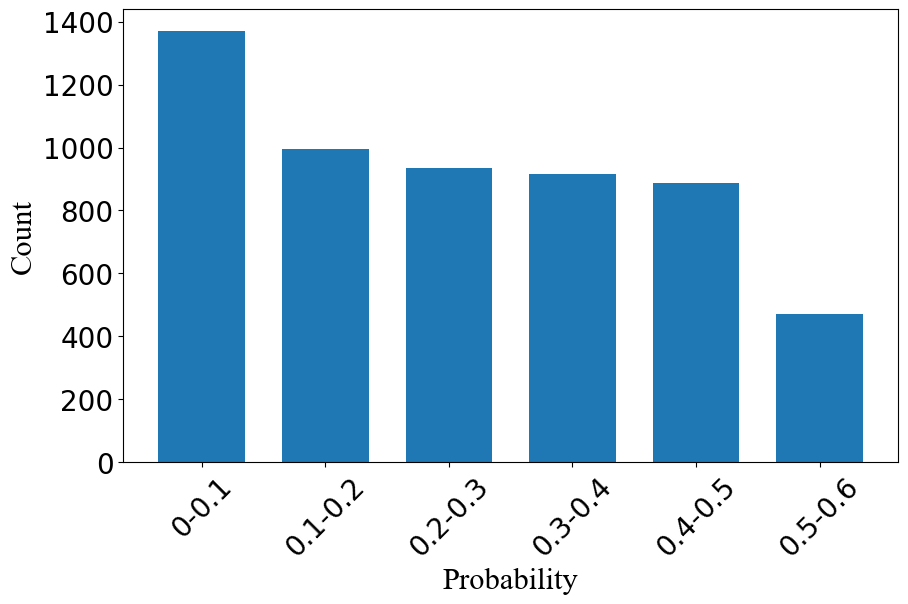

In [74]:
plt.figure(figsize = (10, 6), dpi=100)

FNs_pred_proba2_no05 = [p for p in FNs_pred_proba2 if p!=0.5]


print(len(FNs_pred_proba2_no05), len(FNs_pred_proba2))
FNn2, bins, _ = plt.hist(FNs_pred_proba2, bins=6, range = [0,0.6], align='left', rwidth=0.7)
plt.xlabel('Probability', fontsize = 22, fontname = 'Times New Roman')
plt.ylabel('Count', fontsize = 22, fontname = 'Times New Roman')

plt.xticks(np.arange(0, 0.6, 0.1), ["0-0.1", 
                          "0.1-0.2", 
                          "0.2-0.3", 
                          "0.3-0.4", 
                          "0.4-0.5",
                          "0.5-0.6"],
                           rotation=45, fontsize = 20)
print(FNn2)
# plt.xlim(-0.05, 0.8)

plt.yticks(fontsize=20)
# plt.yscale('log')
# plt.ylim(0.9,2000)
plt.savefig("FN_distribution_tfidf.jpeg", bbox_inches='tight')
plt.show()
# print(FNn)
# plt.show()



In [77]:
plt.figure(figsize = (10, 6))
pred_Nn2, _, _ = plt.hist(pred_neg2, bins=6, range = [0,0.6])
plt.close()


[0.003468   0.03937848 0.09014574 0.1583045  0.25084842 0.21641449]


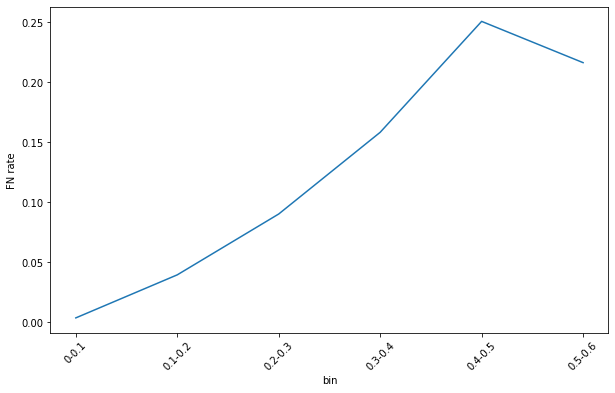

In [79]:
FN_rate2 = np.divide(np.array(FNn2), np.array(pred_Nn2))
print(FN_rate2)
plt.close()
plt.figure(figsize = (10, 6))
plt.plot(FN_rate2)
plt.xticks(np.arange(6), ["0-0.1", 
                          "0.1-0.2", 
                          "0.2-0.3", 
                          "0.3-0.4", 
                          "0.4-0.5",
                          "0.5-0.6"],
                           rotation=45)

plt.ylabel('FN rate')
plt.xlabel('bin')
plt.show()

In [ ]:
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall2, precision2, label='Logistic')
plt.scatter(recall2[ix], precision2[ix], marker='o', color='black', label='Best', s = 50)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [214]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)
pipe2 = Pipeline([('TfidfVect', TfidfVectorizer(stop_words='english',
                                              ngram_range=(2, 3))),
                 ('reducer', SelectKBest(f_classif)),
                 ('clf', LogisticRegression(random_state=0, 
                                            fit_intercept=False, max_iter = 1000, solver='liblinear', 
                                            class_weight = 'balanced'))
                    ])

param_grid = {'reducer__k': [300000, 200000, 100000],
              'clf__C': np.logspace(-3,3,7),
              'clf__penalty': ['l1', 'l2'],
             } 
grid2 = GridSearchCV(pipe2, param_grid, cv=3, scoring='f1', n_jobs = -1)

grid_tfidf = grid2.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(

KeyboardInterrupt



In [ ]:
pipe = Pipeline([('TfidfVect', TfidfVectorizer(stop_words='english',
                                              ngram_range=(2, 3), max_features = 5000)),
                   ('clf', LogisticRegression(random_state=0, 
                                              fit_intercept=False))
                    ])

param_grid = {
              'TfidfVect__min_df': [2, 5, 10],
              'clf__C': np.logspace(-3,3,7),
              'clf__penalty': ['l1', 'l2'],
              'clf__solver': ['liblinear', 'newton-cg', 'lbfgs'],
              'clf__max_iter': [1000, 5000, 10000]
             } 
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs = -1)

grid_tfidf = grid.fit(X_train, y)


%%time

scipy.sparse._csr.csr_matrix

In [60]:
# train logistic regression model

In [127]:
from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(penalty='l1', solver='liblinear', random_state=0, fit_intercept=False, max_iter = 10000).fit(vect_X_train, y_train)
clf = LogisticRegression(random_state=0, fit_intercept=False, max_iter = 10000).fit(vect_X_train, y_train)

# clf.predict(vect_X_train)

In [128]:
train_y_pred_proba = clf.predict_proba(vect_X_train)
train_y_predict_prob_class_1 = train_y_pred_proba[:,1]
train_y_predict_class = [1 if train_y_predict_prob_class_1[i] > 0.96 else 0 for i in range(len(train_y_predict_prob_class_1))]

In [129]:
f'The accuracy score is: {round(accuracy_score(y_train, train_y_predict_class)*100, 2)}%'

'The accuracy score is: 94.28%'